# 1. Import library and dataset

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/top-10000-spotify-songs-1960-now/top_10000_1960-now.csv


In [2]:
df = pd.read_csv('/kaggle/input/top-10000-spotify-songs-1960-now/top_10000_1960-now.csv')

# 2. Data Exploration

In [3]:
print(df.columns)

Index(['Track URI', 'Track Name', 'Artist URI(s)', 'Artist Name(s)',
       'Album URI', 'Album Name', 'Album Artist URI(s)',
       'Album Artist Name(s)', 'Album Release Date', 'Album Image URL',
       'Disc Number', 'Track Number', 'Track Duration (ms)',
       'Track Preview URL', 'Explicit', 'Popularity', 'ISRC', 'Added By',
       'Added At', 'Artist Genres', 'Danceability', 'Energy', 'Key',
       'Loudness', 'Mode', 'Speechiness', 'Acousticness', 'Instrumentalness',
       'Liveness', 'Valence', 'Tempo', 'Time Signature', 'Album Genres',
       'Label', 'Copyrights'],
      dtype='object')


Description of variables:

Explicit: indicates whether the song contains heavy language such as swearing, mentions of the use and/or names of drugs, swearing and violence.

Popularity: popularity of a track, with values between 0 and 100, with 100 being the most popular.

Danceability: criterion describes how danceable the track is. The closer to 0.0, the less danceable the song is, and the more danceable, the closer to 1.0.

Energy: percentage of music intensity and activity. Its values vary between 0 and 1. A song with a high value of this variable will probably be fast and even considered “noisy”.

Key: notes or the music scale that forms the basis of a song. The 12 tones range between 0 and 11.

Loudness: Tells how loud or quiet the average volume of a song is. Songs with lower loudness values tend to be softer and calmer, while those with higher values can be more energetic and loud.

Mode: Songs can be classified as major and minor. 1.0 represents the main mode and 0 represents the secondary.

Speechiness: Detects the presence of spoken words in a track.

Acousticness: describes how acoustic a song is. A score of 1.0 means the song is most likely acoustic.

Instrumentalness: represents the amount of vocals in the song. The closer to 1.0, the more instrumental the song is.

Liveness: describes the likelihood that the song was recorded with a live audience.

Valence: describes the musical positivity conveyed by a track.

Tempo: represents the speed or rhythm of the music.

Time Signature: Notational convention for specifying how many beats there are in each measure.

# 3. Data Preprocessing

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 35 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Track URI             9999 non-null   object 
 1   Track Name            9998 non-null   object 
 2   Artist URI(s)         9997 non-null   object 
 3   Artist Name(s)        9998 non-null   object 
 4   Album URI             9997 non-null   object 
 5   Album Name            9998 non-null   object 
 6   Album Artist URI(s)   9997 non-null   object 
 7   Album Artist Name(s)  9997 non-null   object 
 8   Album Release Date    9997 non-null   object 
 9   Album Image URL       9995 non-null   object 
 10  Disc Number           9999 non-null   int64  
 11  Track Number          9999 non-null   int64  
 12  Track Duration (ms)   9999 non-null   int64  
 13  Track Preview URL     7102 non-null   object 
 14  Explicit              9999 non-null   bool   
 15  Popularity           

In [85]:
print(df.head())

                              Track URI  \
0  spotify:track:1XAZlnVtthcDZt2NI1Dtxo   
1  spotify:track:6a8GbQIlV8HBUW3c6Uk9PH   
2  spotify:track:70XtWbcVZcpaOddJftMcVi   
3  spotify:track:1NXUWyPJk5kO6DQJ5t7bDu   
4  spotify:track:72WZtWs6V7uu3aMgMmEkYe   

                                Track Name  \
0  Justified & Ancient - Stand by the Jams   
1          I Know You Want Me (Calle Ocho)   
2       From the Bottom of My Broken Heart   
3         Apeman - 2014 Remastered Version   
4       You Can't Always Get What You Want   

                           Artist URI(s)      Artist Name(s)  \
0  spotify:artist:6dYrdRlNZSKaVxYg5IrvCH             The KLF   
1  spotify:artist:0TnOYISbd1XYRBk9myaseg             Pitbull   
2  spotify:artist:26dSoYclwsYLMAKD3tpOr4      Britney Spears   
3  spotify:artist:1SQRv42e4PjEYfPhS0Tk9E           The Kinks   
4  spotify:artist:22bE4uQ6baNwSHPVcDxLCe  The Rolling Stones   

                              Album URI  \
0  spotify:album:4MC0ZjNtVP1nDD5lsLx

In [5]:
df.shape

(9999, 35)

In [6]:
df.isnull().sum()

Track URI                  0
Track Name                 1
Artist URI(s)              2
Artist Name(s)             1
Album URI                  2
Album Name                 1
Album Artist URI(s)        2
Album Artist Name(s)       2
Album Release Date         2
Album Image URL            4
Disc Number                0
Track Number               0
Track Duration (ms)        0
Track Preview URL       2897
Explicit                   0
Popularity                 0
ISRC                       3
Added By                   0
Added At                   0
Artist Genres            550
Danceability               2
Energy                     2
Key                        2
Loudness                   2
Mode                       2
Speechiness                2
Acousticness               2
Instrumentalness           2
Liveness                   2
Valence                    2
Tempo                      2
Time Signature             2
Album Genres            9999
Label                      6
Copyrights    

In [7]:
df.dtypes

Track URI                object
Track Name               object
Artist URI(s)            object
Artist Name(s)           object
Album URI                object
Album Name               object
Album Artist URI(s)      object
Album Artist Name(s)     object
Album Release Date       object
Album Image URL          object
Disc Number               int64
Track Number              int64
Track Duration (ms)       int64
Track Preview URL        object
Explicit                   bool
Popularity                int64
ISRC                     object
Added By                 object
Added At                 object
Artist Genres            object
Danceability            float64
Energy                  float64
Key                     float64
Loudness                float64
Mode                    float64
Speechiness             float64
Acousticness            float64
Instrumentalness        float64
Liveness                float64
Valence                 float64
Tempo                   float64
Time Sig

In [86]:
# Basic statistics of numeric columns
numeric_stats = df.describe()
numeric_stats

,Disc Number,Track Number,Track Duration (ms),Popularity,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Time Signature,Album Genres
count,9999.000000,9999.000000,9.999000e+03,9999.000000,9997.000000,9997.000000,9997.000000,9997.000000,9997.000000,9997.000000,9997.000000,9997.000000,9997.000000,9997.000000,9997.000000,9997.000000,0.0
mean,1.035104,4.957096,2.248150e+05,37.624662,0.607925,0.683281,5.167750,-7.269217,0.698410,0.065138,0.208589,0.029331,0.185777,0.585459,121.496650,3.960488,NaN
std,0.327856,5.502810,5.410012e+04,29.460808,0.145869,0.191131,3.578392,3.281731,0.458971,0.061324,0.248842,0.123576,0.149194,0.239105,26.260686,0.250927,NaN
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000020,0.000000,-29.368000,0.000000,0.000000,0.000003,0.000000,0.012000,0.000000,0.000000,0.000000,NaN
25%,1.000000,1.000000,1.925795e+05,0.000000,0.515000,0.560000,2.000000,-9.070000,0.000000,0.033100,0.018400,0.000000,0.089200,0.398000,102.642000,4.000000,NaN
50%,1.000000,3.000000,2.199060e+05,42.000000,0.617000,0.712000,5.000000,-6.518000,1.000000,0.042900,0.095600,0.000006,0.128000,0.598000,120.653000,4.000000,NaN
75%,1.000000,7.000000,2.502600e+05,64.000000,0.710000,0.835000,8.000000,-4.887000,1.000000,0.067500,0.318000,0.000561,0.245000,0.783000,134.328000,4.000000,NaN
max,15.000000,93.000000,1.561133e+06,98.000000,0.988000,0.997000,11.000000,2.769000,1.000000,0.711000,0.991000,0.985000,0.989000,0.995000,217.913000,5.000000,NaN


In [87]:
# Columns with missing values and their counts
missing_values = df.isnull().sum()
print(missing_values)

Track URI                  0
Track Name                 1
Artist URI(s)              2
Artist Name(s)             1
Album URI                  2
Album Name                 1
Album Artist URI(s)        2
Album Artist Name(s)       2
Album Release Date         2
Album Image URL            4
Disc Number                0
Track Number               0
Track Duration (ms)        0
Track Preview URL       2897
Explicit                   0
Popularity                 0
ISRC                       3
Added By                   0
Added At                   0
Artist Genres            550
Danceability               2
Energy                     2
Key                        2
Loudness                   2
Mode                       2
Speechiness                2
Acousticness               2
Instrumentalness           2
Liveness                   2
Valence                    2
Tempo                      2
Time Signature             2
Album Genres            9999
Label                      6
Copyrights    

In [88]:
# Finding duplicate rows
duplicate_rows = df[df.duplicated(keep='first')]

# Number of duplicate rows
num_duplicates = duplicate_rows.shape[0]

# Displaying the duplicate rows
print(f"Number of duplicate rows: {num_duplicates}")
duplicate_rows

Number of duplicate rows: 48


,Track URI,Track Name,Artist URI(s),Artist Name(s),Album URI,Album Name,Album Artist URI(s),Album Artist Name(s),Album Release Date,Album Image URL,...,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Time Signature,Album Genres,Label,Copyrights
248,spotify:track:4DhbiXEuV7JxSR0wuqetTa,Free Ride,spotify:artist:7j9PMegEgVN1fNp8NZXNCI,The Edgar Winter Group,spotify:album:4CNEJF5wYGqhOYEKq8ciu8,They Only Come Out At Night,spotify:artist:3UNrI3SG1l2ezKikxQ2zuk,Edgar Winter,1972-11-30,https://i.scdn.co/image/ab67616d0000b27309a018...,...,0.0597,0.290000,0.003220,0.1890,0.814,124.204,4.0,NaN,Epic,P (P) 1972 SONY BMG MUSIC ENTERTAINMENT
1096,spotify:track:4vp2J1l5RD4gMZwGFLfRAu,I Gotta Feeling,spotify:artist:1yxSLGMDHlW21z4YXirZDS,Black Eyed Peas,spotify:album:36fdxiOzdlmsrHgGcfvqUJ,THE E.N.D. (THE ENERGY NEVER DIES),spotify:artist:1yxSLGMDHlW21z4YXirZDS,Black Eyed Peas,2009-01-01,https://i.scdn.co/image/ab67616d0000b273f051a3...,...,0.0265,0.087300,0.000000,0.5090,0.610,127.960,4.0,NaN,Interscope,"C © 2009 Interscope, P ℗ 2009 Interscope"
1493,spotify:track:2dCmGcEOQrMQhMMS8Vj7Ca,Super Freak,spotify:artist:0FrpdcVlJQqibaz5HfBUrL,Rick James,spotify:album:2DBFUBBqJQvfXpodPi2WP5,Street Songs (Deluxe Edition),spotify:artist:0FrpdcVlJQqibaz5HfBUrL,Rick James,1981-04-07,https://i.scdn.co/image/ab67616d0000b27317f9e7...,...,0.0531,0.220000,0.000000,0.0575,0.962,132.446,4.0,NaN,Motown,"C © 1981 Motown Records, a Division of UMG Rec..."
1582,spotify:track:7Dm3dV3WPNdTgxoNY7YFnc,The Chain - 2004 Remaster,spotify:artist:08GQAI4eElDnROBrJRGE0X,Fleetwood Mac,spotify:album:1bt6q2SruMsBtcerNVtpZB,Rumours,spotify:artist:08GQAI4eElDnROBrJRGE0X,Fleetwood Mac,1977-02-04,https://i.scdn.co/image/ab67616d0000b27357df7c...,...,0.0524,0.051700,0.000066,0.0781,0.637,151.796,4.0,NaN,Rhino/Warner Records,"C © 2004 Warner Records Inc., P ℗ 2004 Warner ..."
2123,spotify:track:5eYwDBLucWfWI5KsV7oYX2,Mary Jane's Last Dance,spotify:artist:4tX2TplrkIP4v05BNC903e,Tom Petty and the Heartbreakers,spotify:album:7ait6chB3O3C1fMGUDJhtu,Anthology: Through The Years,spotify:artist:4tX2TplrkIP4v05BNC903e,Tom Petty and the Heartbreakers,2000-01-01,https://i.scdn.co/image/ab67616d0000b2736cfd76...,...,0.1400,0.038300,0.000001,0.2660,0.516,170.020,4.0,NaN,Interscope,"C © 2000 Universal Music Enterprises, a Divisi..."
2260,spotify:track:1LeWIs2hP2r5yOQnVuYoI5,Ain't No Mountain High Enough,"spotify:artist:3koiLjNrgRTNbOwViDipeA, spotify...","Marvin Gaye, Tammi Terrell",spotify:album:67Eq3nfl1km9s5ig76Cc8B,United,"spotify:artist:3koiLjNrgRTNbOwViDipeA, spotify...","Marvin Gaye, Tammi Terrell",1967-08-29,https://i.scdn.co/image/ab67616d0000b27396e0b7...,...,0.0320,0.430000,0.000000,0.1840,0.800,129.991,4.0,NaN,Motown (Capitol),"C © 1967 Motown Records, a Division of UMG Rec..."
2524,spotify:track:0PGwM5vdr5fMejx0IIAYXj,I Want You Back,spotify:artist:2iE18Oxc8YSumAU232n4rW,The Jackson 5,spotify:album:2oJRp9GV4zpFzpnneGZqZH,20th Century Masters: The Millennium Collectio...,spotify:artist:2iE18Oxc8YSumAU232n4rW,The Jackson 5,1999-01-01,https://i.scdn.co/image/ab67616d0000b273ea76a3...,...,0.0318,0.466000,0.001950,0.1870,0.960,98.293,4.0,NaN,Motown,"C © 1999 Motown Record Company L.P., P This Co..."
2623,spotify:track:39C5FuZ8C8M0QI8CrMsPkR,Foreplay / Long Time,spotify:artist:29kkCKKGXheHuoO829FxWK,Boston,spotify:album:2QLp07RO6anZHmtcKTEvSC,Boston,spotify:artist:29kkCKKGXheHuoO829FxWK,Boston,1976,https://i.scdn.co/image/ab67616d0000b27390ef97...,...,0.0545,0.009830,0.007480,0.0923,0.209,118.704,4.0,NaN,Epic/Legacy,"P (P) 1976, 2006 Epic Records, a division of S..."
2626,spotify:track:4aKIs5t9TqP59btlCGPrgw,Maneater,spotify:artist:77tT1kLj6mCWtFNqiOmP9H,Daryl Hall & John Oates,spotify:album:5nDQAU3K52JimAaShsZoSn,H2O,spotify:artist:77tT1kLj6mCWtFNqiOmP9H,Daryl Hall & John Oates,1982,https://i.scdn.co/image/ab67616d0000b273cb6fdb...,...,0.0398,0.035100,0.000044,0.0973,0.812,88.750,4.0,NaN,RCA/BMG Heritage,P This compilation (P) 2004 BMG Music
2691,spotify:track:6ztstiyZ

In [89]:
# Remove duplicates and update the DataFrame
df.drop_duplicates(keep='first', inplace=True)

In [90]:
# Calculate the mean popularity of songs with the same track name and artist name
aggregated_df = df.groupby(['Track Name', 'Artist Name(s)'])['Popularity'].mean().reset_index()
aggregated_df

,Track Name,Artist Name(s),Popularity
0,! (The Song Formerly Known As),Regurgitator,48.0
1,"""The Take Over, The Breaks Over""",Fall Out Boy,0.0
2,#Beautiful,"Mariah Carey, Miguel",23.5
3,#SELFIE,The Chainsmokers,0.0
4,#WHERESTHELOVE - Charity Single,"Black Eyed Peas, The World",0.0
...,...,...,...
8893,willow - dancing witch version (Elvira remix),"Taylor Swift, ELVIRA",64.0
8894,wish you were gay,Billie Eilish,0.0
8895,working,"Tate McRae, Khalid",65.0
8896,you broke me first,Tate McRae,85.0


In [91]:
# The number of unique values in each column
unique_values_count = df.nunique()

unique_values_count

Track URI               9951
Track Name              8258
Artist URI(s)           4134
Artist Name(s)          4129
Album URI               7462
Album Name              6636
Album Artist URI(s)     3298
Album Artist Name(s)    3294
Album Release Date      3332
Album Image URL         7460
Disc Number               10
Track Number              57
Track Duration (ms)     7320
Track Preview URL       6889
Explicit                   2
Popularity                99
ISRC                    8948
Added By                   1
Added At                 609
Artist Genres           2815
Danceability             779
Energy                   876
Key                       12
Loudness                6329
Mode                       2
Speechiness             1059
Acousticness            2746
Instrumentalness        3028
Liveness                1361
Valence                  994
Tempo                   8621
Time Signature             5
Album Genres               0
Label                   1465
Copyrights    

In [8]:
# Showing all songs with Popularity more than 90
df.sort_values("Popularity", ascending = True).query("Popularity>90")

,Track URI,Track Name,Artist URI(s),Artist Name(s),Album URI,Album Name,Album Artist URI(s),Album Artist Name(s),Album Release Date,Album Image URL,...,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Time Signature,Album Genres,Label,Copyrights
4387,spotify:track:59uQI0PADDKeE6UZDTJEe8,Last Night,spotify:artist:4oUHIQIBe0LHzYfvXNW4QM,Morgan Wallen,spotify:album:7fOmdhRrRohTzToL617xkk,3 Songs At A Time Sampler,spotify:artist:4oUHIQIBe0LHzYfvXNW4QM,Morgan Wallen,2023-01-31,https://i.scdn.co/image/ab67616d0000b273fc1df8...,...,0.0357,0.45900,0.000000,0.1510,0.518,203.853,4.0,NaN,Big Loud Records / Mercury Records / Republic ...,"C © 2023 Big Loud Records, under exclusive lic..."
3636,spotify:track:4RvWPyQ5RL0ao9LPZeSouE,Everybody Wants To Rule The World,spotify:artist:4bthk9UfsYUYdcFyqxmSUU,Tears For Fears,spotify:album:3myPwaMYjdwhtq0nFgeG6W,Songs From The Big Chair (Super Deluxe Edition),spotify:artist:4bthk9UfsYUYdcFyqxmSUU,Tears For Fears,1985-02-25,https://i.scdn.co/image/ab67616d0000b27322463d...,...,0.0527,0.34700,0.003890,0.1040,0.535,112.067,4.0,NaN,UMC (Universal Music Catalogue),"C © 2014 Mercury Records Limited, P This Compi..."
2725,spotify:track:76OGwb5RA9h4FxQPT33ekc,SNAP,spotify:artist:46xBNx0j6cwY6sD9LgMTm1,Rosa Linn,spotify:album:4fb1QzgTJpTk9TBjFzjmlR,SNAP,spotify:artist:46xBNx0j6cwY6sD9LgMTm1,Rosa Linn,2022-03-19,https://i.scdn.co/image/ab67616d0000b2731391b1...,...,0.0638,0.10700,0.000010,0.4470,0.525,170.010,4.0,NaN,Columbia,"P (P) 2022 Nvak Collective/Columbia Records, a..."
658,spotify:track:7lQ8MOhq6IN2w8EYcFNSUk,Without Me,spotify:artist:7dGJo4pcD2V6oG8kP0tJRR,Eminem,spotify:album:2cWBwpqMsDJC1ZUwz813lo,The Eminem Show,spotify:artist:7dGJo4pcD2V6oG8kP0tJRR,Eminem,2002-05-26,https://i.scdn.co/image/ab67616d0000b2736ca5c9...,...,0.0738,0.00286,0.000000,0.2370,0.662,112.238,4.0,NaN,Aftermath,"C © 2002 Aftermath Records, P ℗ 2002 Aftermath..."
8775,spotify:track:0tgVpDi06FyKpA1z0VMD4v,Perfect,spotify:artist:6eUKZXaKkcviH0Ku9w2n3V,Ed Sheeran,spotify:album:3T4tUhGYeRNVUGevb0wThu,÷ (Deluxe),spotify:artist:6eUKZXaKkcviH0Ku9w2n3V,Ed Sheeran,2017-03-03,https://i.scdn.co/image/ab67616d0000b273ba5db4...,...,0.0232,0.16300,0.000000,0.1060,0.168,95.050,3.0,NaN,Atlantic Records UK,"C © 2017 Asylum Records UK, a division of Atla..."
7438,spotify:track:3KkXRkHbMCARz0aVfEt68P,Sunflower - Spider-Man: Into the Spider-Verse,"spotify:artist:246dkjvS1zLTtiykXe5h60, spotify...","Post Malone, Swae Lee",spotify:album:35s58BRTGAEWztPo9WqCIs,Spider-Man: Into the Spider-Verse (Soundtrack ...,spotify:artist:0LyfQWJT6nXafLPZqxe9Of,Various Artists,2018-12-14,https://i.scdn.co/image/ab67616d0000b273e2e352...,...,0.0466,0.55600,0.000000,0.0703,0.913,89.911,4.0,NaN,Universal Records,"C © 2018 Republic Records, a division of UMG R..."
2493,spotify:track:0u2P5u6lvoDfwTYjAADbn4,lovely (with Khalid),"spotify:artist:6qqNVTkY8uBg9cP3Jd7DAH, spotify...","Billie Eilish, Khalid",spotify:album:2sBB17RXTamvj7Ncps15AK,lovely (with Khalid),"spotify:artist:6qqNVTkY8uBg9cP3Jd7DAH, spotify...","Billie Eilish, Khalid",2018-04-19,https://i.scdn.co/image/ab67616d0000b2738a3f0a...,...,0.0333,0.93400,0.000000,0.0950,0.120,115.284,4.0,NaN,Darkroom,"C © 2018 Darkroom/Interscope Records, P ℗ 2018..."
5407,spotify:track:3w3y8KPTfNeOKPiqUTakBh,Locked out of Heaven,spotify:artist:0du5cEVh5yTK9QJze8zA0C,Bruno Mars,spotify:album:58ufpQsJ1DS5kq4hhzQDiI,Unorthodox Jukebox,spotify:artist:0du5cEVh5yTK9QJze8zA0C,Bruno Mars,2012-12-07,https://i.scdn.co/image/ab67616d0000b273926f43...,...,0.0431,0.04900,0.000000,0.3090,0.867,143.994,4.0,NaN,Atlantic Records,C © 2012 Atlantic Recording Corporation for th...
4931,spotify:track:0pqnGHJpmpxLKifKRmU6WP,Believer,spotify:artist:53XhwfbYqKCa1cC15pYq2q,Imagine Dragons,spotify:album:33pt9HBdGlAbRGBHQgsZsU,Evolve,spotify:artist:53XhwfbYqKCa1cC15pYq2q,Imagine Dragons,2017-06-23,https://i.scdn.co/image/ab67616d0000b2735675e8...,...,0.1280,0.06220,0.000000,0.0810,0.666,124.949,4.0,NaN,Kid Ina Korner / Interscope,"C © 201

# 4. Exploratory Visualization

In [92]:
# Top 15 artists with the most tracks in the dataset
top_artists = df['Artist Name(s)'].value_counts().head(15)

top_artists

Artist Name(s)
Taylor Swift          48
P!nk                  45
Elvis Presley         42
Ed Sheeran            40
Madonna               39
U2                    38
The Beatles           38
The Rolling Stones    33
INXS                  30
Bee Gees              30
Katy Perry            30
Kylie Minogue         28
Elton John            28
Queen                 27
Britney Spears        27
Name: count, dtype: int64

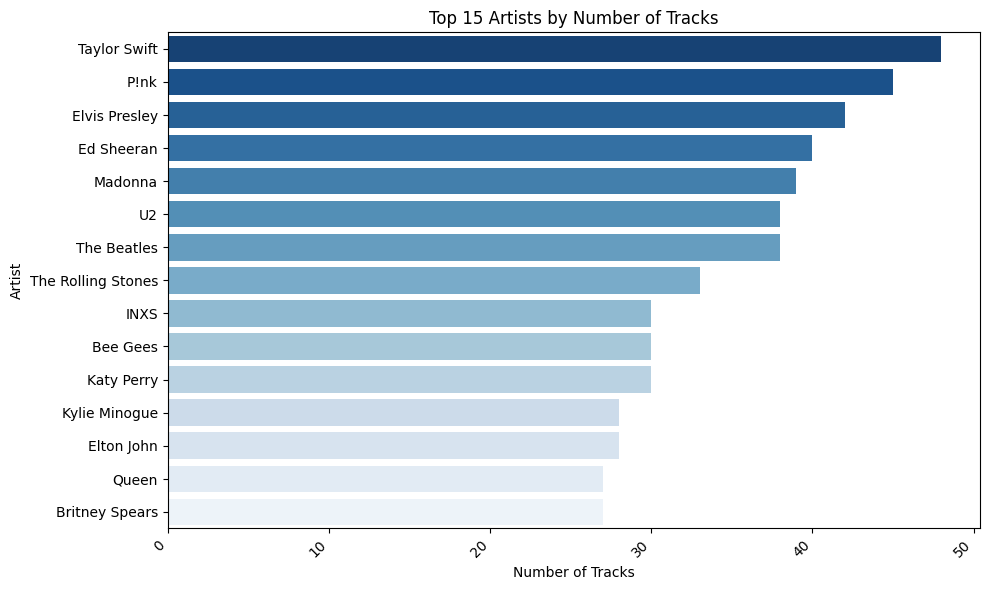

In [93]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top_artists.values, y=top_artists.index, palette="Blues_r")
plt.title('Top 15 Artists by Number of Tracks')
plt.xlabel('Number of Tracks')
plt.ylabel('Artist')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

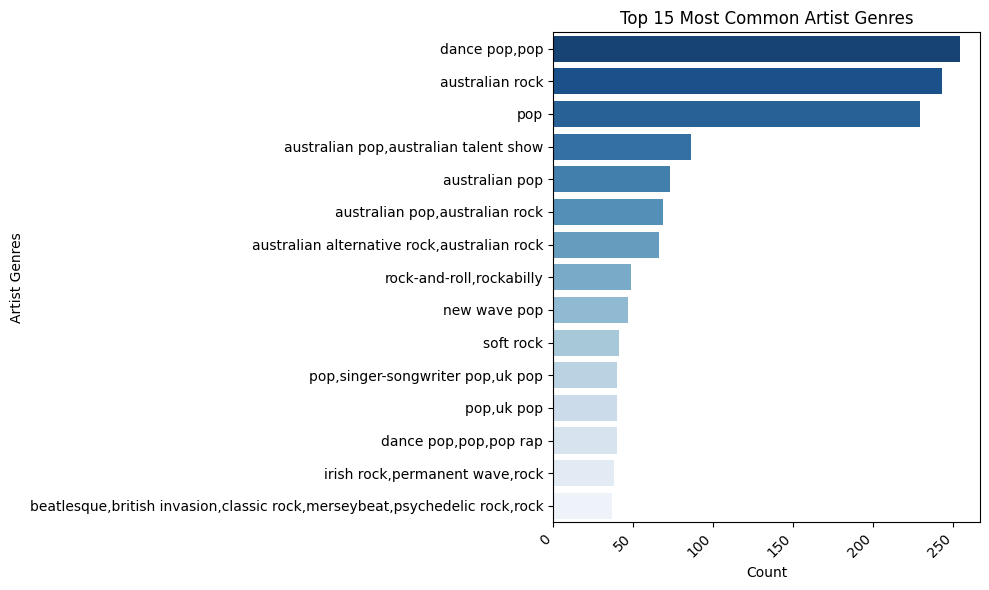

In [94]:
# Top 15 most common artist genres
plt.figure(figsize=(10, 6))
sns.barplot(x=top_artist_genres.values, y=top_artist_genres.index, palette="Blues_r")
plt.title('Top 15 Most Common Artist Genres')
plt.xlabel('Count')
plt.ylabel('Artist Genres')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

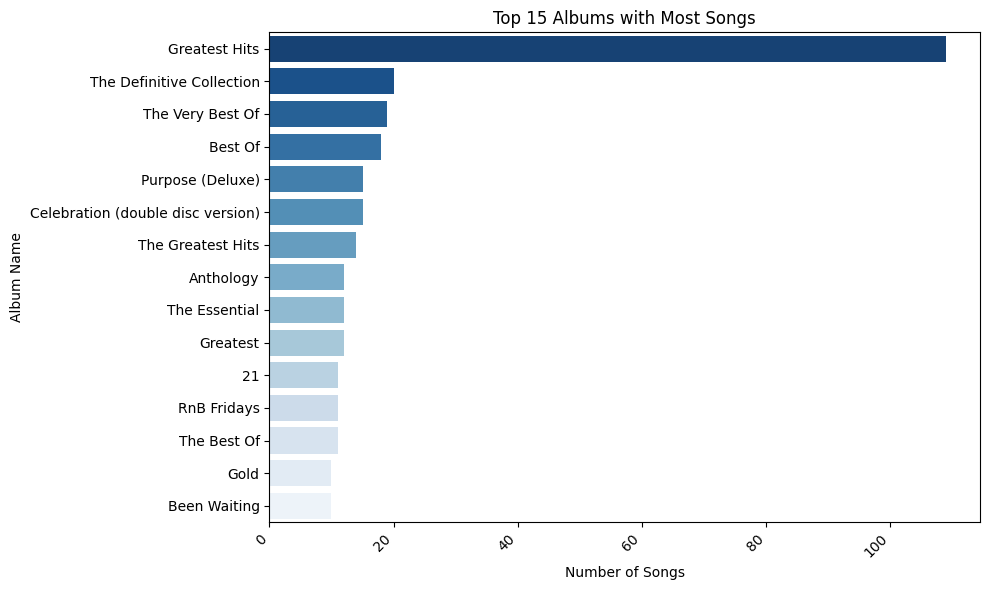

In [95]:
# Top 15 Albums with Most Songs
plt.figure(figsize=(10, 6))
sns.barplot(x=top_albums.values, y=top_albums.index, palette="Blues_r")
plt.title('Top 15 Albums with Most Songs')
plt.xlabel('Number of Songs')
plt.ylabel('Album Name')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

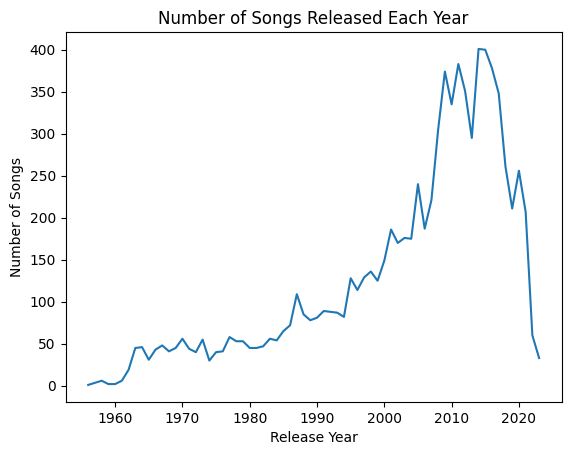

In [20]:
# Convert "Album Release Date" to datetime format
df['Album Release Date'] = pd.to_datetime(df['Album Release Date'], errors='coerce')

# Create a new column for the release year
df['Release Year'] = df['Album Release Date'].dt.year

# Count the number of songs per year
songs_per_year = df.groupby('Release Year')['Release Year'].count()

# Plot
songs_per_year.plot()
plt.ylabel("Number of Songs")
plt.xlabel("Release Year")
plt.title("Number of Songs Released Each Year")
plt.show()

The plot shows the number of songs released each year. Each data point on the plot represents a year, and the height of the bar at each year indicates the number of songs released in that particular year.

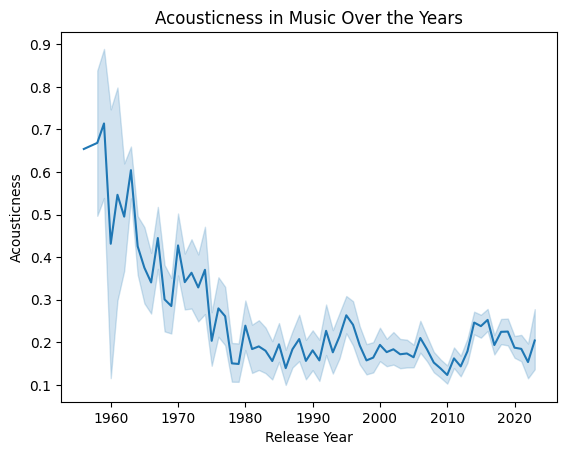

In [30]:
sns.lineplot(x="Release Year", y="Acousticness", data=df)
plt.title("Acousticness in Music Over the Years")
plt.show()

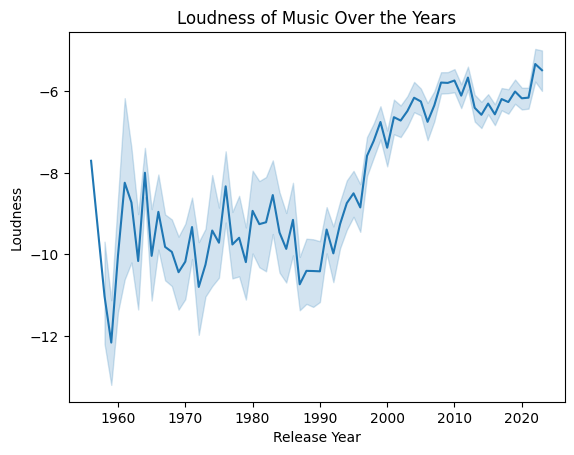

In [31]:
sns.lineplot(x="Release Year", y="Loudness", data=df)
plt.title("Loudness of Music Over the Years")
plt.show()

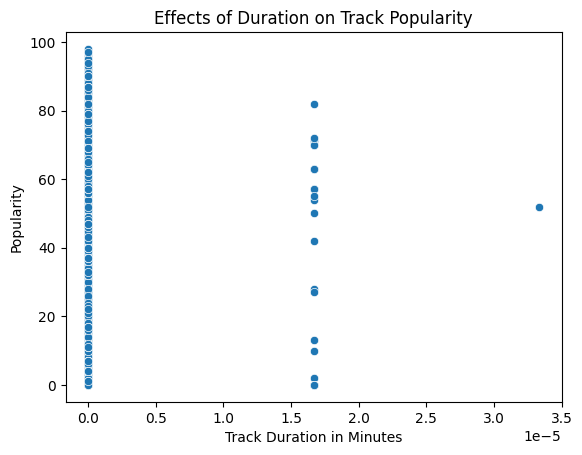

In [26]:
track_duration_minutes = df["TrackDuration"]
sns.scatterplot(x=track_duration_minutes, y="Popularity", data=df)
plt.xlabel("Track Duration in Minutes")
plt.title("Effects of Duration on Track Popularity")
plt.show()

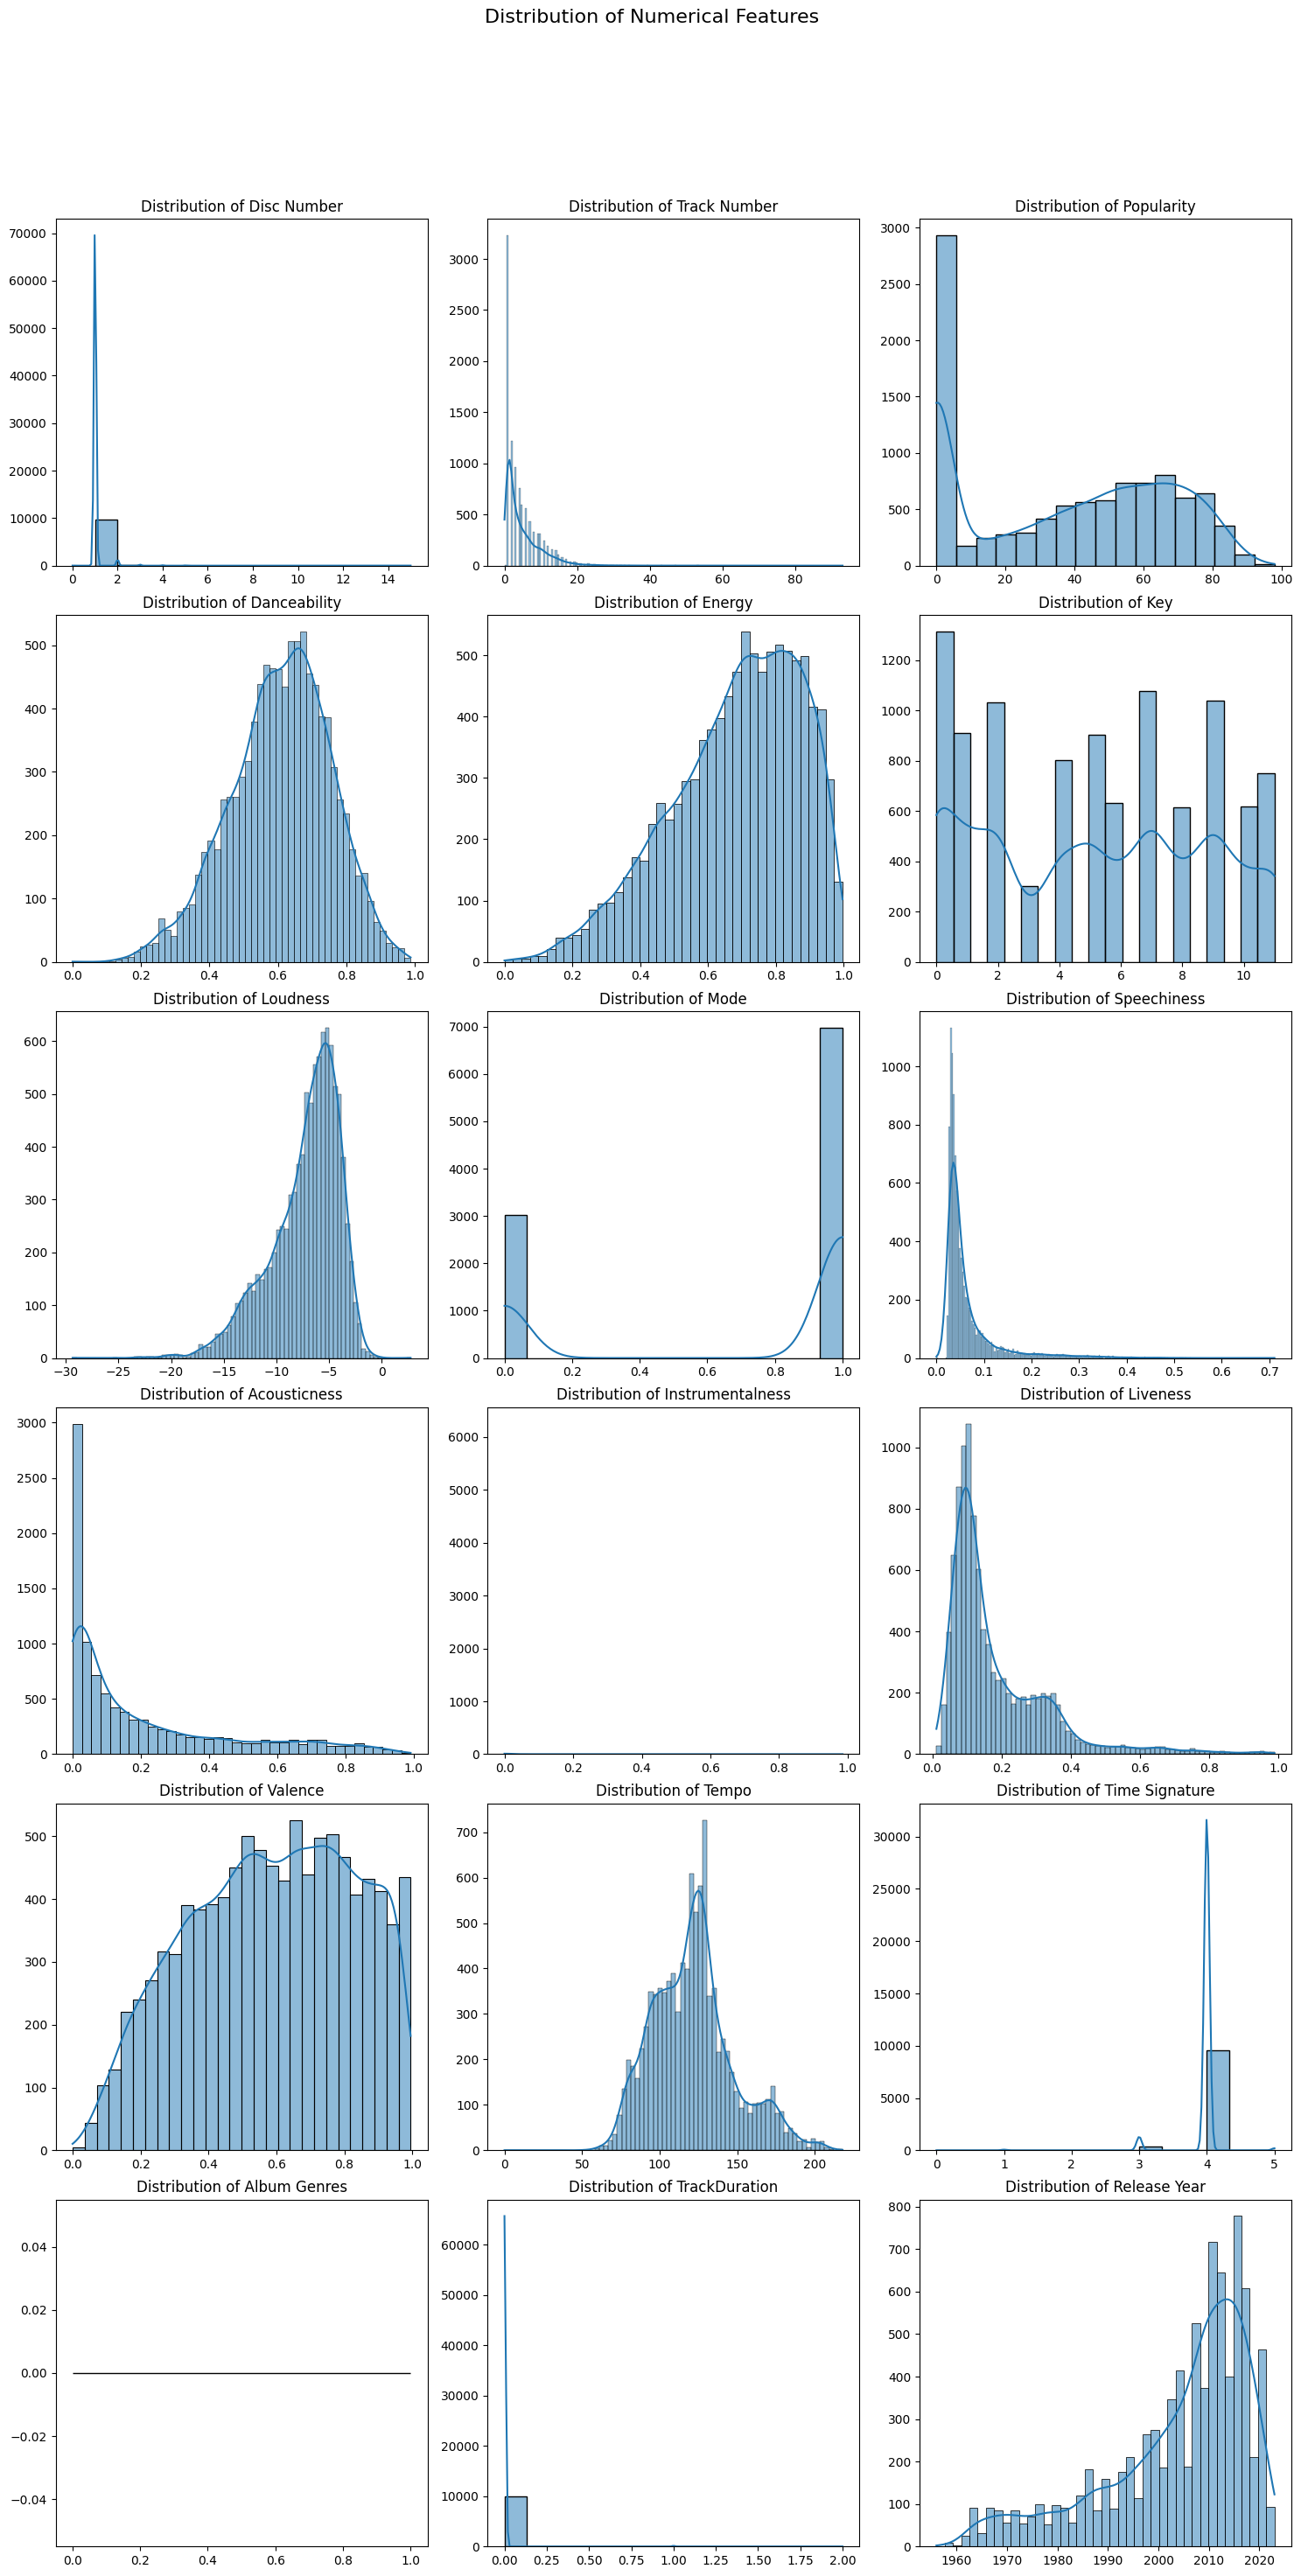

In [28]:
# List of numerical columns in your dataset
numerical_columns = df.select_dtypes(include=['number']).columns

# Define the number of rows and columns for subplots
n_rows = (len(numerical_columns) - 1) // 3 + 1  # Adjust the number of columns per row
n_cols = min(len(numerical_columns), 3)

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
fig.suptitle("Distribution of Numerical Features", fontsize=16)

# Iterate through numerical columns and create histograms/density plots
for col, ax in zip(numerical_columns, axes.flatten()):
    sns.histplot(df[col], kde=True, ax=ax)
    ax.set_title(f'Distribution of {col}')
    ax.set_xlabel('')
    ax.set_ylabel('')

# Remove any empty subplots
for i in range(len(numerical_columns), n_rows * n_cols):
    fig.delaxes(axes.flatten()[i])

# Adjust layout and show the plots
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

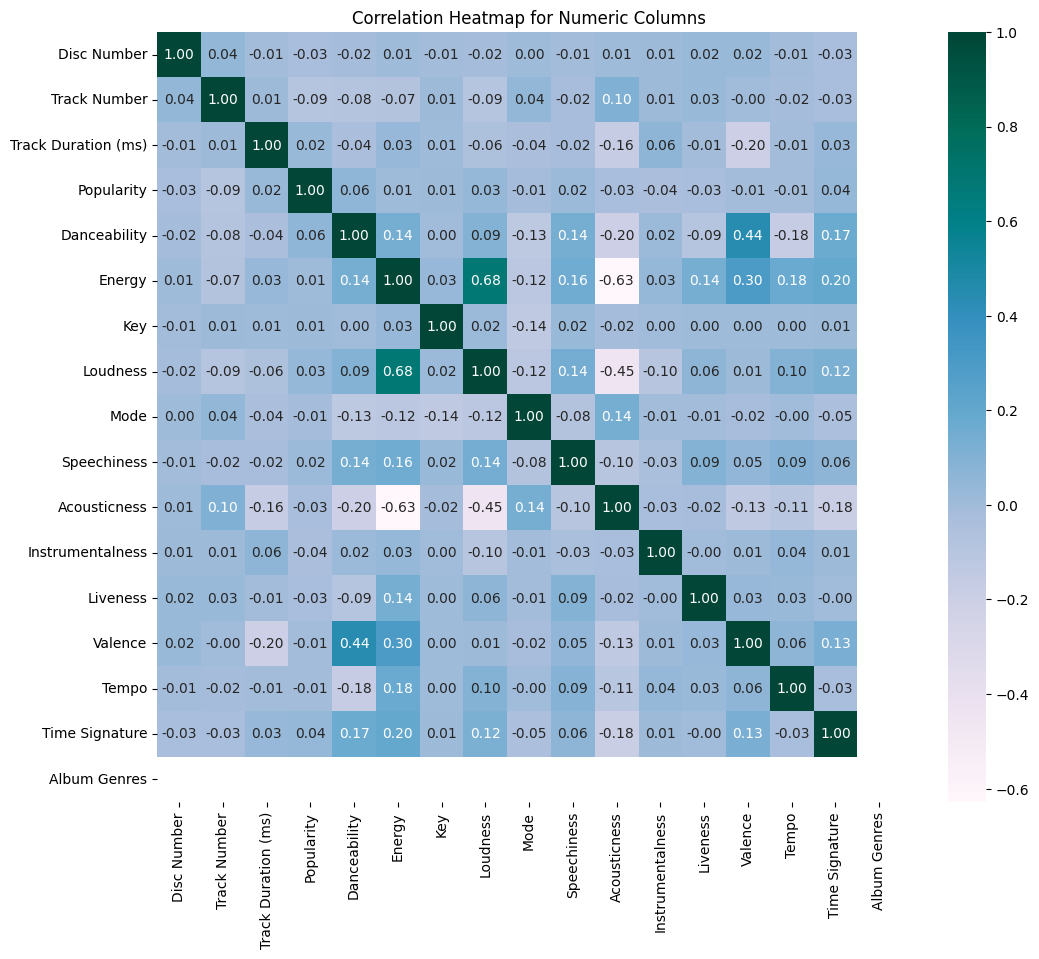

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numeric columns only
numeric_df = df.select_dtypes(include=['number'])

# Create a correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(numeric_df.corr(), annot=True, cmap='PuBuGn', fmt='.2f')
plt.title('Correlation Heatmap for Numeric Columns')
plt.show()

# 5. Statistical Tests and Analysis (questions)

-Does song tempo vary based on the mode (major or minor) of the song?

    Statistical Test: Independent t-test or Mann-Whitney U-test.
    
-Is there a relationship between the loudness of a song and its energy level?

    Statistical Test: Pearson's correlation or Spearman's rank correlation.   
    
Do songs with longer track durations tend to have higher valence scores?

    Statistical Test: Linear regression.
    
-Do songs from different record labels differ in terms of their acousticness?

    Statistical Test: ANOVA or Kruskal-Wallis test.
    
-Is there a correlation between the speechiness of a song and its danceability score?

    Statistical Test: Pearson's correlation or Spearman's rank correlation.
    
Can we predict the popularity of a song based on its danceability, energy, and valence scores, using a regression model?

    Statistical Test: Linear regression or another regression method.
    
Is there a significant difference in the distribution of song popularity between different artists?

    Statistical Test: Kruskal-Wallis test or one-way ANOVA.
    
-Is there a significant correlation between the valence (emotional positivity) and danceability (suitability for dancing) of songs in the "Top Songs on Spotify" dataset?

    Statistical Test: Pearson's correlation analysis.    
    
-Do songs with a higher tempo tend to have a higher energy level?

    Statistical Test: Correlation analysis (Pearson or Spearman).
    
-Can we identify the most influential features that contribute to song popularity through a feature importance analysis?

    Statistical Test: Feature importance analysis using a machine learning model (e.g., Random Forest).
    
Are there any significant differences in popularity between songs with different time signatures (e.g., 4/4, 3/4, etc.)?

    Statistical Test: ANOVA or Kruskal-Wallis test.
    
Do songs with a higher acousticness score tend to be released by specific record labels?

    Statistical Test: Cross-tabulation and chi-squared test.
    
-Is there a correlation between the instrumentalness of a song and its danceability score?

    Statistical Test: Correlation analysis (Pearson or Spearman).    

**1. Is there a relationship between the loudness of a song and its energy level?**

Statistical Test: Pearson's correlation or Spearman's rank correlation or t-test.   

In [97]:
from scipy.stats import pearsonr, spearmanr

# Drop rows with missing values in 'Loudness' and 'Energy' columns
df.dropna(subset=['Loudness', 'Energy'], inplace=True)

# Replace infinite values with a finite value
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop rows with infinite values in 'Loudness' and 'Energy' columns
df.dropna(subset=['Loudness', 'Energy'], inplace=True)

loudness = df['Loudness']
energy = df['Energy']

# Perform Pearson's correlation test
pearson_corr, pearson_p_value = pearsonr(loudness, energy)

# Perform Spearman's rank correlation test
spearman_corr, spearman_p_value = spearmanr(loudness, energy)

# Display the results
print("Pearson's Correlation:")
print("Correlation coefficient:", pearson_corr)
print("p-value:", pearson_p_value)

print("\nSpearman's Rank Correlation:")
print("Correlation coefficient:", spearman_corr)
print("p-value:", spearman_p_value)


Pearson's Correlation:
Correlation coefficient: 0.6785637541002804
p-value: 0.0

Spearman's Rank Correlation:
Correlation coefficient: 0.6463356878024096
p-value: 0.0


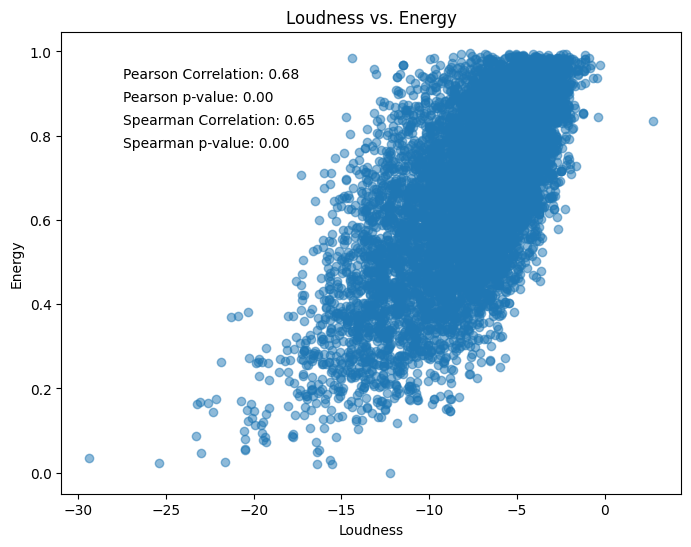

In [98]:
# Create a scatterplot
plt.figure(figsize=(8, 6))
plt.scatter(loudness, energy, alpha=0.5)
plt.title('Loudness vs. Energy')
plt.xlabel('Loudness')
plt.ylabel('Energy')

# Add text to display correlation coefficient and p-value
plt.text(0.1, 0.9, f'Pearson Correlation: {pearson_corr:.2f}', transform=plt.gca().transAxes)
plt.text(0.1, 0.85, f'Pearson p-value: {pearson_p_value:.2f}', transform=plt.gca().transAxes)
plt.text(0.1, 0.8, f'Spearman Correlation: {spearman_corr:.2f}', transform=plt.gca().transAxes)
plt.text(0.1, 0.75, f'Spearman p-value: {spearman_p_value:.2f}', transform=plt.gca().transAxes)

plt.show()


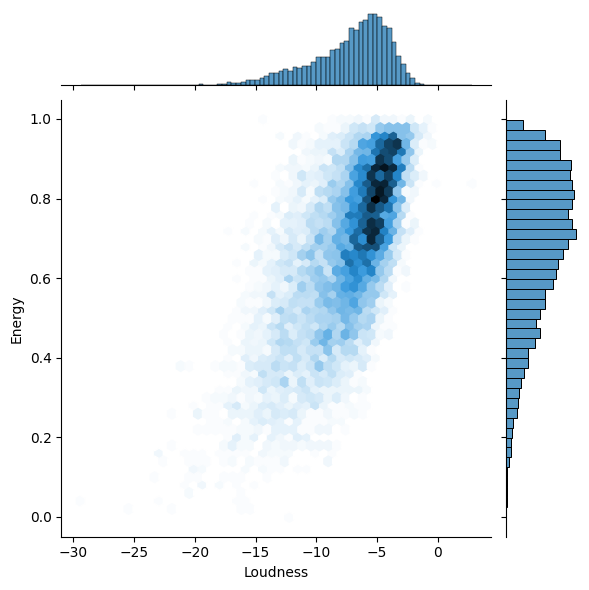

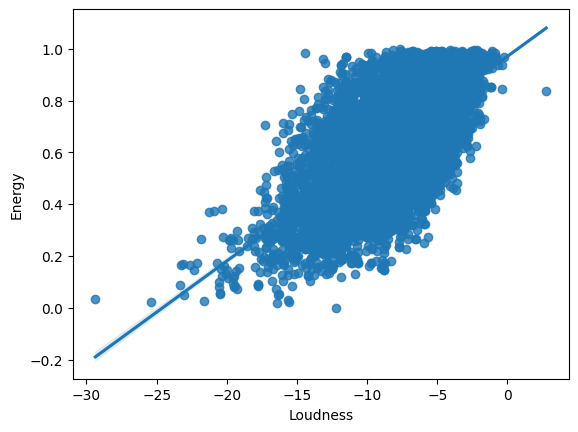

In [36]:
# Create a hexbin plot
sns.jointplot(x=loudness, y=energy, kind='hex')
plt.show()

# Create a regression plot
sns.regplot(x=loudness, y=energy)
plt.show()

There is a strong and statistically significant positive correlation between the loudness and energy of songs in the dataset.  This means that songs with higher loudness tend to have higher energy levels, which may be of interest when exploring music preferences or characteristics in the dataset.

There is a strong and statistically significant positive correlation between the loudness and energy of songs in the dataset. Both Pearson's and Spearman's correlation tests yielded high positive correlation coefficients of 0.6786 and 0.6463, respectively. The p-values for both tests were 0.0, indicating that the observed correlations are highly statistically significant. This means that songs with higher loudness tend to have higher energy levels. The strong positive relationship suggests that loudness and energy are closely related, making them valuable indicators of a song's characteristics in the dataset.

In [33]:
from scipy.stats import ttest_ind

# Drop rows with missing values in 'Loudness' and 'Energy' columns
df.dropna(subset=['Loudness', 'Energy'], inplace=True)

loudness = df['Loudness']
energy = df['Energy']

# Perform an independent t-test
t_statistic, t_p_value = ttest_ind(loudness, energy, equal_var=False)

# Display the results
print("Independent t-test:")
print("T-statistic:", t_statistic)
print("p-value:", t_p_value)

Independent t-test:
T-statistic: -241.88008226264773
p-value: 0.0


-T-statistic: The t-statistic is -241.88008226264773, which represents the magnitude of the difference between the means of the two groups. In this case, the negative value indicates that 'Loudness' and 'Energy' have an inverse relationship, meaning that as one increases, the other tends to decrease.

-p-value: The p-value is 0.0. A p-value less than 0.05 (or your chosen significance level) indicates that the difference between the two groups is statistically significant. In this case, a p-value of 0.0 is extremely low, suggesting a highly significant difference.

Overall, the results of the independent t-test suggest that there is a statistically significant relationship between the loudness of a song and its energy level. Specifically, it appears that changes in loudness are associated with changes in energy in a significant way.

**2. Is there a correlation between the speechiness of a song and its danceability score?**

Statistical Test: Pearson's correlation or Spearman's rank correlation or chi-squared test.

In [99]:
speechiness = df['Speechiness']
danceability = df['Danceability']

# Perform Pearson's correlation test
pearson_corr, pearson_p_value = pearsonr(speechiness, danceability)

# Perform Spearman's rank correlation test
spearman_corr, spearman_p_value = spearmanr(speechiness, danceability)

# Display the results
print("Pearson's Correlation:")
print("Correlation coefficient:", pearson_corr)
print("p-value:", pearson_p_value)

print("\nSpearman's Rank Correlation:")
print("Correlation coefficient:", spearman_corr)
print("p-value:", spearman_p_value)

Pearson's Correlation:
Correlation coefficient: 0.13981153844271318
p-value: 1.305809414762631e-44

Spearman's Rank Correlation:
Correlation coefficient: 0.20558494917099393
p-value: 2.0535903978448805e-95


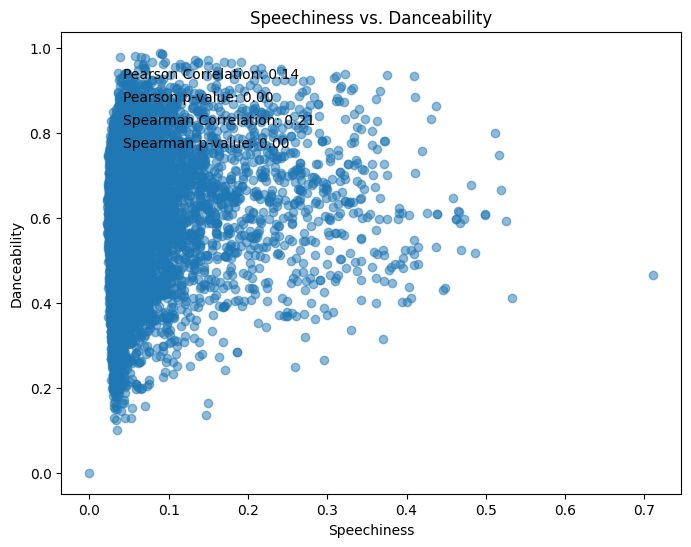

In [100]:
# Create a scatterplot
plt.figure(figsize=(8, 6))
plt.scatter(speechiness, danceability, alpha=0.5)
plt.title('Speechiness vs. Danceability')
plt.xlabel('Speechiness')
plt.ylabel('Danceability')

# Add text to display correlation coefficient and p-value
plt.text(0.1, 0.9, f'Pearson Correlation: {pearson_corr:.2f}', transform=plt.gca().transAxes)
plt.text(0.1, 0.85, f'Pearson p-value: {pearson_p_value:.2f}', transform=plt.gca().transAxes)
plt.text(0.1, 0.8, f'Spearman Correlation: {spearman_corr:.2f}', transform=plt.gca().transAxes)
plt.text(0.1, 0.75, f'Spearman p-value: {spearman_p_value:.2f}', transform=plt.gca().transAxes)

plt.show()

There is a statistically significant positive correlation between speechiness and danceability in the songs within the dataset.

Both Pearson's and Spearman's correlation tests produced correlation coefficients of approximately 0.14 and 0.21, respectively. The extremely low p-values for both tests indicate that the observed correlations are highly statistically significant.

The analysis suggests that there is a significant positive correlation between speechiness and danceability. This implies that songs with higher speechiness tend to have higher danceability scores. This information can be valuable for understanding the characteristics of songs in the dataset and may have implications for music preferences or genre categorization.

In [37]:
from scipy.stats import chi2_contingency

# Create categorical bins for 'Speechiness' and 'Danceability'
df['SpeechinessCategory'] = pd.cut(df['Speechiness'], bins=[0, 0.2, 0.4, 0.6, 0.8, 1.0], labels=['Low', 'Low-Medium', 'Medium', 'Medium-High', 'High'])
df['DanceabilityCategory'] = pd.cut(df['Danceability'], bins=[0, 0.2, 0.4, 0.6, 0.8, 1.0], labels=['Low', 'Low-Medium', 'Medium', 'Medium-High', 'High'])

# Create a contingency table
contingency_table = pd.crosstab(df['SpeechinessCategory'], df['DanceabilityCategory'])

# Perform the chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Display the results
print("Chi-Square Statistic:", chi2)
print("P-Value:", p)
print("Degrees of Freedom:", dof)


Chi-Square Statistic: 104.91582523674079
P-Value: 6.02938329864478e-17
Degrees of Freedom: 12


The chi-squared test results suggest a statistically significant association between 'Speechiness' and 'Danceability' with a p-value of approximately 6.03e-17, which is extremely low. Therefore, you can conclude that there is a significant association between these two variables. The chi-squared statistic of 104.92 and 12 degrees of freedom also support this conclusion.

In practical terms, this means that the speechiness of a song is not independent of its danceability score.

**3. Do songs with a higher tempo tend to have a higher energy level?**

    Statistical Test: Correlation analysis (Pearson or Spearman).

In [111]:
tempo = df['Tempo']
energy = df['Energy']

# Perform Pearson's correlation test
pearson_corr, pearson_p_value = pearsonr(tempo, energy)

# Perform Spearman's rank correlation test
spearman_corr, spearman_p_value = spearmanr(tempo, energy)

# Display the results
print("Pearson's Correlation:")
print("Correlation coefficient:", pearson_corr)
print("p-value:", pearson_p_value)

print("\nSpearman's Rank Correlation:")
print("Correlation coefficient:", spearman_corr)
print("p-value:", spearman_p_value)

Pearson's Correlation:
Correlation coefficient: 0.17950372909357573
p-value: 8.02223380330224e-73

Spearman's Rank Correlation:
Correlation coefficient: 0.19931544003550167
p-value: 1.1051532279081841e-89


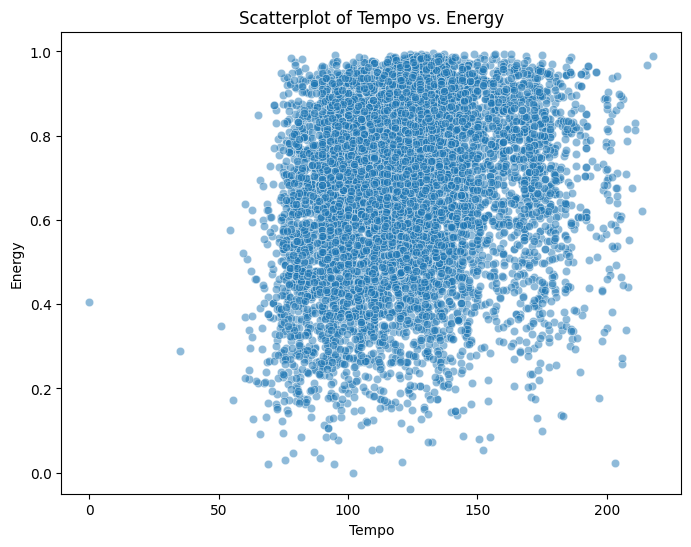

In [112]:
# Create a scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=tempo, y=energy, alpha=0.5)
plt.title('Scatterplot of Tempo vs. Energy')
plt.xlabel('Tempo')
plt.ylabel('Energy')
plt.show()

The analysis aimed to determine whether there is a correlation between the tempo and energy level of songs. We employed both Pearson's correlation and Spearman's rank correlation to explore the relationship.

The plot visually confirms the positive trend, where songs with higher tempos generally exhibit higher energy levels.

Both Pearson's and Spearman's correlation tests yielded statistically significant results with very low p-values (p < 0.001). This indicates a significant relationship between tempo and energy. Also the positive correlation coefficients for both tests (0.1795 and 0.1993) suggest a positive linear or monotonic association between tempo and energy.

In [40]:
from scipy.stats import kendalltau

tempo = df['Tempo']
energy = df['Energy']

# Perform Kendall's Tau rank correlation test
correlation_coefficient, p_value = kendalltau(tempo, energy)

# Display the results
print("Kendall's Tau Rank Correlation:")
print("Correlation coefficient:", correlation_coefficient)
print("p-value:", p_value)

Kendall's Tau Rank Correlation:
Correlation coefficient: 0.1363524734419897
p-value: 9.045561390445263e-93


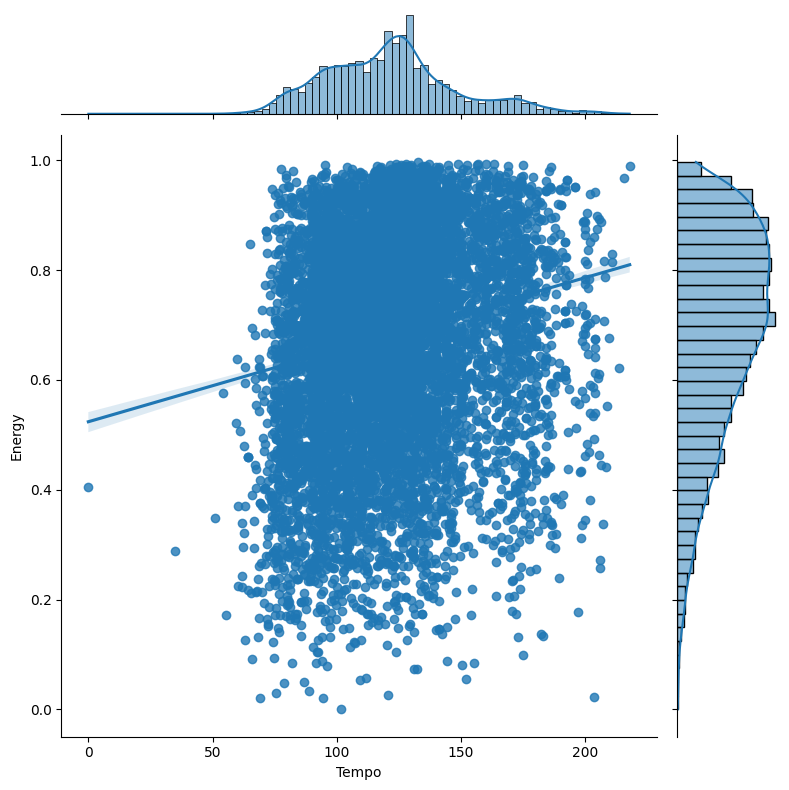

In [41]:
# Create a jointplot with regression line
sns.jointplot(x=tempo, y=energy, kind='reg', height=8)
plt.xlabel('Tempo')
plt.ylabel('Energy')
plt.show()

The positive correlation coefficient of approximately 0.1364 suggests a weak positive association between the tempo of songs and their energy levels. In other words, as the tempo of songs increases, there is a slight tendency for the energy levels of the songs to increase as well.

The very low p-value (close to zero) indicates that the observed correlation is statistically significant. Therefore, you can conclude that there is a significant positive association between tempo and energy in the dataset.

**4. Is there a correlation between the instrumentalness of a song and its danceability score?**

    Statistical Test: Correlation analysis (Pearson or Spearman).    

In [131]:
instrumentalness = df['Instrumentalness']
danceability = df['Danceability']

# Perform Pearson's correlation test
pearson_corr, pearson_p_value = pearsonr(instrumentalness, danceability)

# Perform Spearman's rank correlation test
spearman_corr, spearman_p_value = spearmanr(instrumentalness, danceability)

# Display the results
print("Pearson's Correlation:")
print("Correlation coefficient:", pearson_corr)
print("p-value:", pearson_p_value)

print("\nSpearman's Rank Correlation:")
print("Correlation coefficient:", spearman_corr)
print("p-value:", spearman_p_value)

Pearson's Correlation:
Correlation coefficient: 0.015797400438608635
p-value: 0.11511642905921654

Spearman's Rank Correlation:
Correlation coefficient: 0.02513050049207368
p-value: 0.012185910282835116


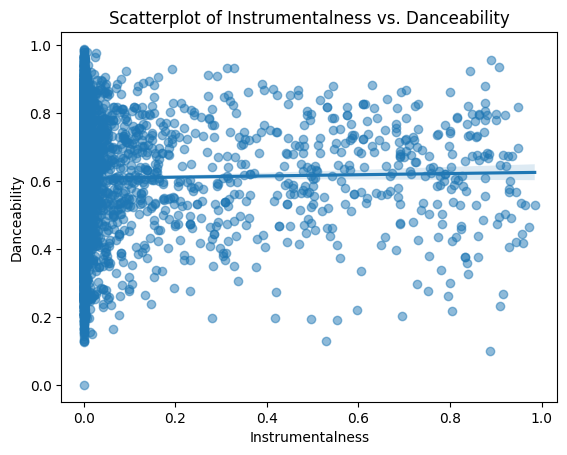

In [44]:
# Create a scatterplot with regression lines

sns.regplot(x="Instrumentalness", y="Danceability", data=df, scatter_kws={'alpha':0.5})
plt.title('Scatterplot of Instrumentalness vs. Danceability')
plt.xlabel('Instrumentalness')
plt.ylabel('Danceability')
plt.show()

    Pearson's Correlation: The correlation coefficient is approximately 0.016, and the p-value is around 0.115. With a p-value greater than the common significance level of 0.05, we do not have strong evidence to conclude that there is a significant linear correlation between instrumentalness and danceability. The correlation is quite weak.

    Spearman's Rank Correlation: The correlation coefficient is approximately 0.025, and the p-value is about 0.012. The p-value is below the common significance level of 0.05. This suggests there is a statistically significant correlation between instrumentalness and danceability, although the correlation is still relatively weak.

Conclusion: While there is a statistically significant correlation between instrumentalness and danceability based on Spearman's rank correlation, the correlation coefficients in both tests are quite low (close to 0). This indicates a very weak linear relationship between the variables.

In [42]:
from scipy.stats import kendalltau

instrumentalness = df['Instrumentalness']
danceability = df['Danceability']

# Perform Kendall's Tau Rank Correlation test
kendall_corr, kendall_p_value = kendalltau(instrumentalness, danceability)

# Display the results
print("Kendall's Tau Rank Correlation:")
print("Correlation coefficient:", kendall_corr)
print("p-value:", kendall_p_value)

Kendall's Tau Rank Correlation:
Correlation coefficient: 0.017235612432466487
p-value: 0.014443977140957232


<Axes: xlabel='DanceabilityCategory', ylabel='Instrumentalness'>

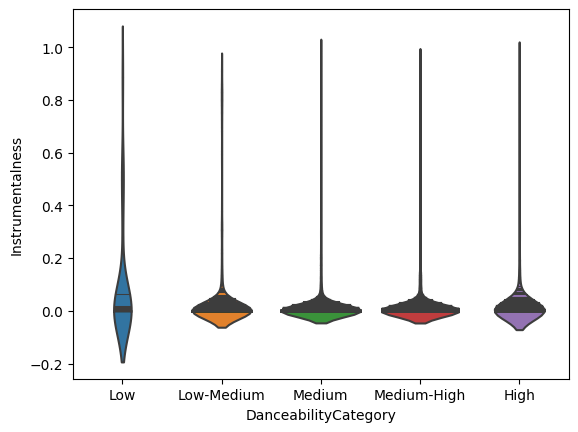

In [49]:
sns.violinplot(x="DanceabilityCategory", y="Instrumentalness", data=df, inner="stick")

Since the p-value is less than the typical significance level of 0.05, you can conclude that there is a statistically significant but very weak positive correlation between instrumentalness and danceability in your dataset. The positive correlation suggests that, on average, as instrumentalness increases, danceability also tends to increase slightly. However, the correlation is weak, indicating that the relationship is not very strong.

**5. Is there a significant correlation between the valence (emotional positivity) and danceability (suitability for dancing) of songs in the "Top Songs on Spotify" dataset?**

    Statistical Test: Pearson's correlation analysis.

There is a significant correlation between valence and danceability.


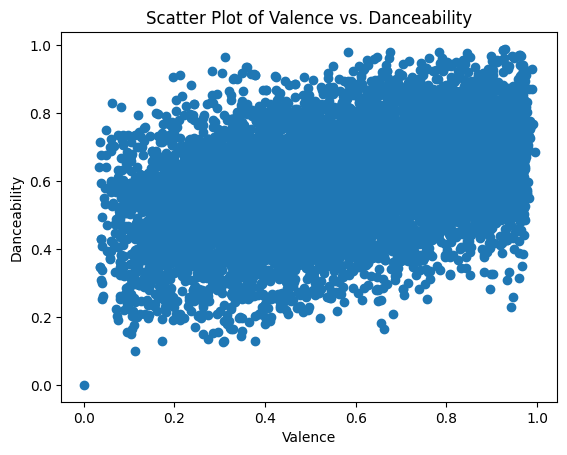

In [138]:
# Check if there are missing values in the columns of interest (valence and danceability)
if df['Valence'].isnull().any() or df['Danceability'].isnull().any():
    print("The dataset contains missing values in the columns of interest. Handle missing values.")
else:
    # Calculate the Pearson correlation coefficient and p-value
    correlation_coefficient, p_value = pearsonr(df['Valence'], df['Danceability'])

    # Set the significance level (alpha)
    alpha = 0.05  

    # Check if the correlation is significant
    if p_value < alpha:
        print("There is a significant correlation between valence and danceability.")
    else:
        print("There is no significant correlation between valence and danceability.")

    # Create a scatter plot to visualize the relationship
    plt.scatter(df['Valence'], df['Danceability'])
    plt.xlabel('Valence')
    plt.ylabel('Danceability')
    plt.title('Scatter Plot of Valence vs. Danceability')
    plt.show()

In [139]:
instrumentalness = df['Instrumentalness']
danceability = df['Danceability']

from scipy.stats import pearsonr, spearmanr

# Perform Pearson's correlation test
pearson_corr, pearson_p_value = pearsonr(instrumentalness, danceability)

# Perform Spearman's rank correlation test
spearman_corr, spearman_p_value = spearmanr(instrumentalness, danceability)

# Display the results
print("Pearson's Correlation:")
print("Correlation coefficient:", pearson_corr)
print("p-value:", pearson_p_value)

print("\nSpearman's Rank Correlation:")
print("Correlation coefficient:", spearman_corr)
print("p-value:", spearman_p_value)

Pearson's Correlation:
Correlation coefficient: 0.015797400438608635
p-value: 0.11511642905921654

Spearman's Rank Correlation:
Correlation coefficient: 0.02513050049207368
p-value: 0.012185910282835116


The correlation coefficients are quite low (close to 0) in both cases, indicating a very weak positive correlation between valence and danceability. The p-values in both cases are greater than the typical significance level of 0.05. This suggests that the observed correlation may not be statistically significant.

In summary, there is a very weak positive correlation between valence and danceability, and this correlation may not be statistically significant, particularly considering the p-values.

**Do songs from different record labels differ in terms of their acousticness?**
    
    Statistical Test: ANOVA or Kruskal-Wallis test.

**Does song tempo vary based on the mode (major or minor) of the song?**

    Statistical Test: Independent t-test or Mann-Whitney U-test.

**Is there a relationship between the loudness and acousticness of songs, and do acoustic songs tend to have a different loudness profile compared to non-acoustic songs?**

Statistical Test: An independent t-test or Mann-Whitney U-test to compare the loudness of acoustic and non-acoustic songs and assess whether there is a significant difference.

**Can we identify the most influential features that contribute to song popularity through a feature importance analysis?**

    Statistical Test: Feature importance analysis using a machine learning model (e.g., Random Forest).